In [771]:
import pandas as pd
import numpy as np


train = pd.read_csv("D:\\Machine Learning\\Data sets\\house-prices-advanced-regression-techniques\\train.csv")
test = pd.read_csv("D:\\Machine Learning\\Data sets\\house-prices-advanced-regression-techniques\\test.csv")

# creating a copy of the test data

testc = test.copy()



comb = pd.concat([train, testc], ignore_index=True, sort = False)


Let's see how many columns have Null values in them and if its worth to impute the values in the missing columns. If the column values have more than 20% of missing values its better to drop them since it will only create improper data or we might end up skewing the inputs.

In [772]:
#calculating % null values in each column 
null_val_col = comb.isnull().sum()/len(train) *100

# Now filtering the null values according to the threshold limit

null_drop = []
for i in range(0,80):
    if null_val_col[i] > 20:
        print(null_val_col.index[i])
        null_drop.append(null_val_col.index[i])
   
        

LotFrontage
Alley
FireplaceQu
PoolQC
Fence
MiscFeature


Seeing this ittruly does not make sense to impute them or even use them, we can save some memory.

In [773]:
comb.drop(null_drop, axis = 1, inplace = True )
#testc.drop(null_drop, axis = 1, inplace = True )
comb.head()



,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


Now we find other null value columns which we can work on

In [774]:
null_val_col = comb.isnull().sum()/len(train) *100
null_cols = []

for i in range(0,75):
    if null_val_col[i] > 0:
        print(null_val_col.index[i], " ", null_val_col[i]," ")
        null_cols.append(null_val_col.index[i])
        
null_cols

MSZoning   0.273972602739726  
Utilities   0.136986301369863  
Exterior1st   0.0684931506849315  
Exterior2nd   0.0684931506849315  
MasVnrType   1.643835616438356  
MasVnrArea   1.5753424657534247  
BsmtQual   5.5479452054794525  
BsmtCond   5.616438356164384  
BsmtExposure   5.616438356164384  
BsmtFinType1   5.410958904109589  
BsmtFinSF1   0.0684931506849315  
BsmtFinType2   5.47945205479452  
BsmtFinSF2   0.0684931506849315  
BsmtUnfSF   0.0684931506849315  
TotalBsmtSF   0.0684931506849315  
Electrical   0.0684931506849315  
BsmtFullBath   0.136986301369863  
BsmtHalfBath   0.136986301369863  
KitchenQual   0.0684931506849315  
Functional   0.136986301369863  
GarageType   10.753424657534246  
GarageYrBlt   10.89041095890411  
GarageFinish   10.89041095890411  
GarageCars   0.0684931506849315  
GarageArea   0.0684931506849315  
GarageQual   10.89041095890411  
GarageCond   10.89041095890411  
SaleType   0.0684931506849315  
SalePrice   99.93150684931507  


['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'SaleType',
 'SalePrice']

In [775]:
comb['MSZoning'] = comb['MSZoning'].fillna(method = 'ffill')
comb[ 'Utilities'] = comb[ 'Utilities'].fillna(method = 'ffill')
comb[ 'Exterior1st'] = comb[ 'Exterior1st'].fillna(method = 'ffill')
comb[ 'Exterior2nd'] = comb[ 'Exterior2nd'].fillna(method = 'ffill')
comb[ 'MasVnrType'] = comb[ 'MasVnrType'].fillna(method = 'ffill')
comb[ 'MasVnrArea'] = comb[ 'MasVnrArea'].fillna(0)
comb[ 'BsmtQual'] = comb[ 'BsmtQual'].fillna(method = 'ffill')
comb[ 'BsmtCond'] = comb[ 'BsmtCond'].fillna(method = 'ffill')
comb[ 'BsmtExposure'] = comb[ 'BsmtExposure'].fillna(method = 'ffill')
comb[ 'BsmtFinType1'] = comb[ 'BsmtFinType1'].fillna(method = 'ffill')
comb[ 'BsmtFinSF1'] = comb[ 'BsmtFinSF1'].fillna(0)
comb[ 'BsmtFinType2'] = comb[ 'BsmtFinType2'].fillna(method = 'ffill')
comb[ 'BsmtFinSF2'] = comb[ 'BsmtFinSF2'].fillna(0)
comb[ 'BsmtUnfSF'] = comb[ 'BsmtUnfSF'].fillna(0)
comb[ 'TotalBsmtSF'] = comb[ 'TotalBsmtSF'].fillna(0)
comb[ 'Electrical'] = comb[ 'Electrical'].fillna(method = 'ffill')
comb[ 'BsmtFullBath'] = comb[ 'BsmtFullBath'].fillna(method = 'ffill')
comb[ 'BsmtHalfBath'] = comb[ 'BsmtHalfBath'].fillna(method = 'ffill')
comb[ 'KitchenQual'] = comb[ 'KitchenQual'].fillna(method = 'ffill')
comb[ 'Functional'] = comb[ 'Functional'].fillna(method = 'ffill')
comb[ 'GarageType'] = comb[ 'GarageType'].fillna(method = 'ffill')
comb[ 'GarageYrBlt'] = comb[ 'GarageYrBlt'].fillna(0)
comb[ 'GarageFinish'] = comb[ 'GarageFinish'].fillna(method = 'ffill')
comb[ 'GarageCars'] = comb[ 'GarageCars'].fillna(method = 'ffill')
comb[ 'GarageArea'] = comb[ 'GarageArea'].fillna(0)
comb[ 'GarageQual'] = comb[ 'GarageQual'].fillna(method = 'ffill')
comb[ 'GarageCond'] = comb[ 'GarageCond'].fillna(method = 'ffill')
comb[ 'SaleType'] = comb[ 'SaleType'].fillna(method = 'ffill')
#comb[ 'SalePrice'] = comb[ 'SalePrice'].fillna(0)


In [776]:

import matplotlib.pyplot as plt
import seaborn as sns

#checking which columns are non integers
print("-----------------Non Numeric columns-----------")
print(comb[null_cols].select_dtypes(include = 'object').head())

print("----------------- Numeric columns------------------------")
print(train[null_cols].select_dtypes(exclude = 'object').head())

-----------------Non Numeric columns-----------
  MSZoning Utilities Exterior1st Exterior2nd MasVnrType BsmtQual BsmtCond  \
0       RL    AllPub     VinylSd     VinylSd    BrkFace       Gd       TA   
1       RL    AllPub     MetalSd     MetalSd       None       Gd       TA   
2       RL    AllPub     VinylSd     VinylSd    BrkFace       Gd       TA   
3       RL    AllPub     Wd Sdng     Wd Shng       None       TA       Gd   
4       RL    AllPub     VinylSd     VinylSd    BrkFace       Gd       TA   

  BsmtExposure BsmtFinType1 BsmtFinType2 Electrical KitchenQual Functional  \
0           No          GLQ          Unf      SBrkr          Gd        Typ   
1           Gd          ALQ          Unf      SBrkr          TA        Typ   
2           Mn          GLQ          Unf      SBrkr          Gd        Typ   
3           No          ALQ          Unf      SBrkr          Gd        Typ   
4           Av          GLQ          Unf      SBrkr          Gd        Typ   

  GarageType GarageF

In [777]:
train['LotFrontage'] = train['LotFrontage'].fillna(method = 'ffill')
train[ 'MasVnrType'] = train[ 'MasVnrType'].fillna(method = 'ffill')
train['MasVnrArea'] = train['MasVnrArea'].fillna(method = 'ffill')
train[ 'BsmtQual'] = train[ 'BsmtQual'].fillna(method = 'ffill')
train[ 'BsmtCond'] = train[ 'BsmtCond'].fillna(method = 'ffill')
train[ 'BsmtExposure'] = train[ 'BsmtExposure'].fillna(method = 'ffill')
train[ 'BsmtFinType1'] = train[ 'BsmtFinType1'].fillna(method = 'ffill')
train['BsmtFinType2'] = train['BsmtFinType2'].fillna(method = 'ffill')
train[ 'Electrical'] = train[ 'Electrical'].fillna(method = 'ffill')
train[ 'GarageType'] = train[ 'GarageType'].fillna(method = 'ffill')
train[ 'GarageYrBlt'] = train[ 'GarageYrBlt'].fillna(method = 'ffill')
train[ 'GarageFinish'] = train[ 'GarageFinish'].fillna(method = 'ffill')
train[ 'GarageQual'] = train[ 'GarageQual'].fillna(method = 'ffill')
train[ 'GarageCond'] = train[ 'GarageCond'].fillna(method = 'ffill')


testc['LotFrontage'] = testc['LotFrontage'].fillna(method = 'ffill')
testc[ 'MasVnrType'] = testc[ 'MasVnrType'].fillna(method = 'ffill')
testc['MasVnrArea'] = testc['MasVnrArea'].fillna(method = 'ffill')
testc[ 'BsmtQual'] = testc[ 'BsmtQual'].fillna(method = 'ffill')
testc[ 'BsmtCond'] = testc[ 'BsmtCond'].fillna(method = 'ffill')
testc[ 'BsmtExposure'] = testc[ 'BsmtExposure'].fillna(method = 'ffill')
testc[ 'BsmtFinType1'] = testc[ 'BsmtFinType1'].fillna(method = 'ffill')
testc['BsmtFinType2'] = testc['BsmtFinType2'].fillna(method = 'ffill')
testc[ 'Electrical'] = testc[ 'Electrical'].fillna(method = 'ffill')
testc[ 'GarageType'] = testc[ 'GarageType'].fillna(method = 'ffill')
testc[ 'GarageYrBlt'] = testc[ 'GarageYrBlt'].fillna(method = 'ffill')
testc[ 'GarageFinish'] = testc[ 'GarageFinish'].fillna(method = 'ffill')
testc[ 'GarageQual'] = testc[ 'GarageQual'].fillna(method = 'ffill')
testc[ 'GarageCond'] = testc[ 'GarageCond'].fillna(method = 'ffill')


In [778]:
null_val_col = testc.isnull().sum()/len(train) *100
null_cols = []

for i in range(0,testc.shape[1]):
    if null_val_col[i] > 0:
        print(null_val_col.index[i], " ", null_val_col[i]," ")
        null_cols.append(null_val_col.index[i])
        


#print("-----------------Non Numeric columns-----------")
#print(train[null_cols].select_dtypes(include = 'object').head())

#print("----------------- Numeric columns------------------------")
#print(train[null_cols].select_dtypes(exclude = 'object').head())

testc['MSZoning'] = testc['MSZoning'].fillna(method = 'ffill')
testc[ 'Utilities'] = testc[ 'Utilities'].fillna(method = 'ffill')
testc[ 'Exterior1st'] = testc[ 'Exterior1st'].fillna(method = 'ffill')
testc[ 'Exterior2nd'] = testc[ 'Exterior2nd'].fillna(method = 'ffill')
testc[ 'BsmtFinSF1'] = testc[ 'BsmtFinSF1'].fillna(0)
testc[ 'BsmtFinSF2'] = testc[ 'BsmtFinSF2'].fillna(0)
testc[ 'BsmtUnfSF'] = testc[ 'BsmtUnfSF'].fillna(0)
testc[ 'TotalBsmtSF'] = testc[ 'TotalBsmtSF'].fillna(0)
testc[ 'BsmtFullBath'] = testc[ 'BsmtFullBath'].fillna(0)
testc[ 'BsmtHalfBath'] = testc[ 'BsmtHalfBath'].fillna(0)
testc[ 'KitchenQual'] = testc[ 'KitchenQual'].fillna(method = 'ffill')
testc[ 'Functional'] = testc[ 'Functional'].fillna(method = 'ffill')
testc[ 'GarageCars'] = testc[ 'GarageCars'].fillna(0)
testc[ 'GarageArea'] = testc[ 'GarageArea'].fillna(0)
testc[ 'SaleType'] = testc[ 'SaleType'].fillna(method = 'ffill')

print(null_cols)

MSZoning   0.273972602739726  
Alley   92.6027397260274  
Utilities   0.136986301369863  
Exterior1st   0.0684931506849315  
Exterior2nd   0.0684931506849315  
BsmtFinSF1   0.0684931506849315  
BsmtFinSF2   0.0684931506849315  
BsmtUnfSF   0.0684931506849315  
TotalBsmtSF   0.0684931506849315  
BsmtFullBath   0.136986301369863  
BsmtHalfBath   0.136986301369863  
KitchenQual   0.0684931506849315  
Functional   0.136986301369863  
FireplaceQu   50.0  
GarageCars   0.0684931506849315  
GarageArea   0.0684931506849315  
PoolQC   99.72602739726028  
Fence   80.06849315068493  
MiscFeature   96.43835616438356  
SaleType   0.0684931506849315  
['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageCars', 'GarageArea', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


So, all NA vales are fill now and we should be good to go.

In [779]:
train.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [780]:
null_val_col = comb.isnull().sum()/len(train) *100
null_cols = []

for i in range(0,comb.shape[1]):
    if null_val_col[i] > 0:
        print(null_val_col.index[i], " ", null_val_col[i]," ")
        null_cols.append(null_val_col.index[i])
null_cols

SalePrice   99.93150684931507  


['SalePrice']

In [781]:
corr_mat = train.corr()
#sns.set(font_scale=2.1)
#plt.figure(figsize = (40,30))
#sns.heatmap(corr_mat, annot = True)



In [782]:
print(corr_mat)

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.007803 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.343125 -0.139781     0.032628   
LotFrontage   -0.007803   -0.343125     1.000000  0.272696     0.215195   
LotArea       -0.033226   -0.139781     0.272696  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.215195  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.058140 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.107828  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.069945  0.013788     0.550684   
MasVnrArea    -0.048708    0.023039     0.165727  0.103227     0.410111   
BsmtFinSF1    -0.005024   -0.069836     0.188568  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.044697  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.114749 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

Highly correlated columns would mean that they are kind of linear and may be removed in if we want to preserve data with optimum number of columns with highest variance.

Lets perform some EDA on the features affecting the sale price

Text(0.5, 1.0, 'YearBuilt- Price scatter plot')

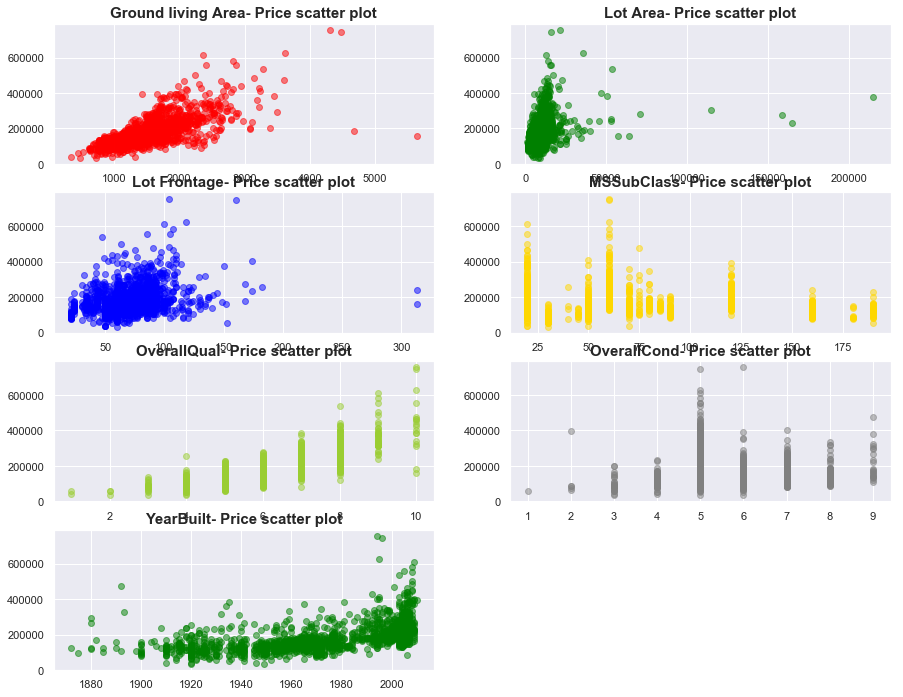

In [783]:
fig = plt.figure(figsize=(15,15))

ax = plt.subplot2grid((5,2),(0,0))
plt.scatter(x = train['GrLivArea'], y =train['SalePrice'],color = ['red'],alpha = 0.5)
plt.title('Ground living Area- Price scatter plot', fontsize=15, weight='bold' )

ax = plt.subplot2grid((5,2),(0,1))
plt.scatter(x = train['LotArea'], y =train['SalePrice'],color = ['green'],alpha = 0.5)
plt.title('Lot Area- Price scatter plot', fontsize=15, weight='bold' )

ax = plt.subplot2grid((5,2),(1,0))
plt.scatter(x = train['LotFrontage'], y =train['SalePrice'],color = ['blue'],alpha = 0.5)
plt.title('Lot Frontage- Price scatter plot', fontsize=15, weight='bold' )

ax = plt.subplot2grid((5,2),(1,1))
plt.scatter(x = train['MSSubClass'], y =train['SalePrice'],color = ['gold'],alpha = 0.5)
plt.title('MSSubClass- Price scatter plot', fontsize=15, weight='bold' )

ax = plt.subplot2grid((5,2),(2,0))
plt.scatter(x = train['OverallQual'], y =train['SalePrice'],color = ['yellowgreen'],alpha = 0.5)
plt.title('OverallQual- Price scatter plot', fontsize=15, weight='bold' )

ax = plt.subplot2grid((5,2),(2,1))
plt.scatter(x = train['OverallCond'], y =train['SalePrice'],color = ['grey'],alpha = 0.5)
plt.title('OverallCond- Price scatter plot', fontsize=15, weight='bold' )

ax = plt.subplot2grid((5,2),(3,0))
plt.scatter(x = train['YearBuilt'], y =train['SalePrice'],color = ['green'],alpha = 0.5)
plt.title('YearBuilt- Price scatter plot', fontsize=15, weight='bold' )

In [784]:
processed_train = comb.loc[comb['SalePrice'].notna()]
processed_test = comb.loc[comb['SalePrice'].isna()]

In [809]:
processed_train = pd.get_dummies(processed_train)
processed_test = pd.get_dummies(processed_test)


train_proc, test_proc = processed_train.align(processed_test, join='right', axis=1)



#processed_train.to_csv("D:\\Machine Learning\\train_cols.csv")

#processed_test.to_csv("D:\\Machine Learning\\test_cols.csv")



null_cols = []


test_proc.drop(['SalePrice'], axis = 1, inplace = True )

train_proc.drop(['SalePrice'], axis = 1, inplace = True )

null_val_col = test_proc.isnull().sum()/len(train) *100
for i in range(0,test_proc.shape[1]):
    if null_val_col[i] > 0:
        print(null_val_col.index[i], " ", null_val_col[i]," ")
        null_cols.append(null_val_col.index[i])
null_cols

print(test_proc.shape)
print(train_proc.shape)

(1459, 254)
(1460, 254)


In [810]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = train_proc

y = train['SalePrice']


x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = .33, random_state=42)


scaler= StandardScaler()

# transform "x_train"
x_train = scaler.fit_transform(x_train)
# transform "x_test"
x_test = scaler.transform(x_test)
#Transform the test set
X_test= scaler.transform(test_proc)



In [811]:
from sklearn.linear_model import Lasso
import math
import sklearn.metrics as sklm


lasso=Lasso()

lasso_mod=Lasso()

lasso_mod.fit(x_train,y_train)

print(y_train.shape)
print(x_train.shape)
print(y_test.shape)
print(x_test.shape)


y_lasso_train=lasso_mod.predict(X_test)



(978,)
(978, 254)
(482,)
(482, 254)


c:\users\asus\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84486284830.62622, tolerance: 566931384.728802
  positive)


In [812]:
final_submission = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": y_lasso_train
    })
final_submission.to_csv("D:\\Machine Learning\\Data sets\\house-prices-advanced-regression-techniques\\final_submission2.csv", index=False)
final_submission.head()

,Id,SalePrice
0,1461,112961.920376
1,1462,113944.987716
2,1463,170507.791094
3,1464,188186.650891
4,1465,223734.941186
